# Visualización del DataSet: IMDB 5000 Movie

Este notebook se va a estructurar de la siguiente manera:
1. Carga del dataset
2. Visualizaciones interesantes

## 1. Carga del dataset

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# import warnings
# warnings.filterwarnings('ignore')

df = pd.read_csv("imdb_5000_movies_limpio.csv")

## 2. Visualizaciones interesantes

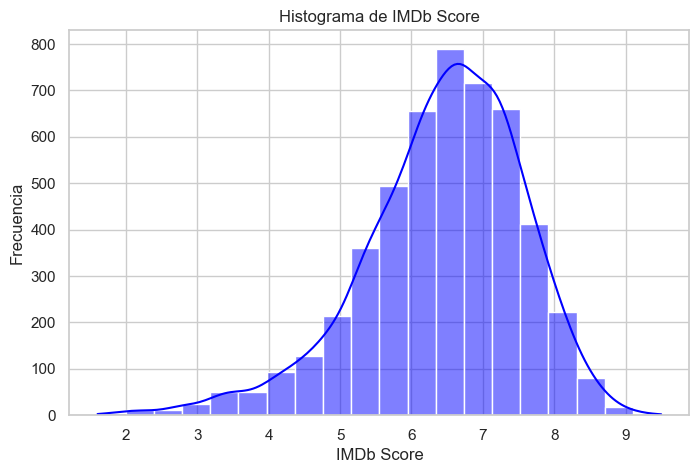

In [154]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Imdb Score"], bins=20, kde=True, color="blue")
plt.title("Histograma de IMDb Score")
plt.xlabel("IMDb Score")
plt.ylabel("Frecuencia")
plt.show()

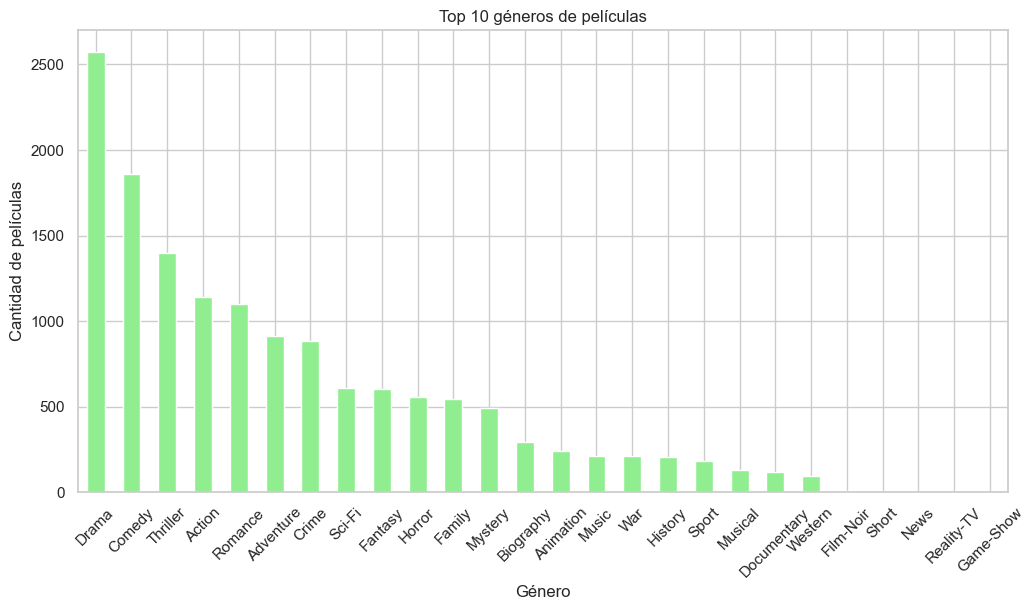

In [155]:
generos = df['Genres'].str.split('|').explode().value_counts()

plt.figure(figsize=(12,6))
generos.plot(kind='bar', color='lightgreen')
plt.title('Top 10 géneros de películas')
plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45)
plt.show()

In [156]:
# generos = generos.assign(Genre=df['Genres'].str.split('|')).explode('Genre')

# plt.figure(figsize=(12,6))
# sns.violinplot(x='Genre', y='Imdb Score', data=generos)
# plt.title('Distribución de IMDb Score por género (Violin Plot)')
# plt.xlabel('Género')
# plt.ylabel('IMDb Score')
# plt.xticks(rotation=45)
# plt.show()

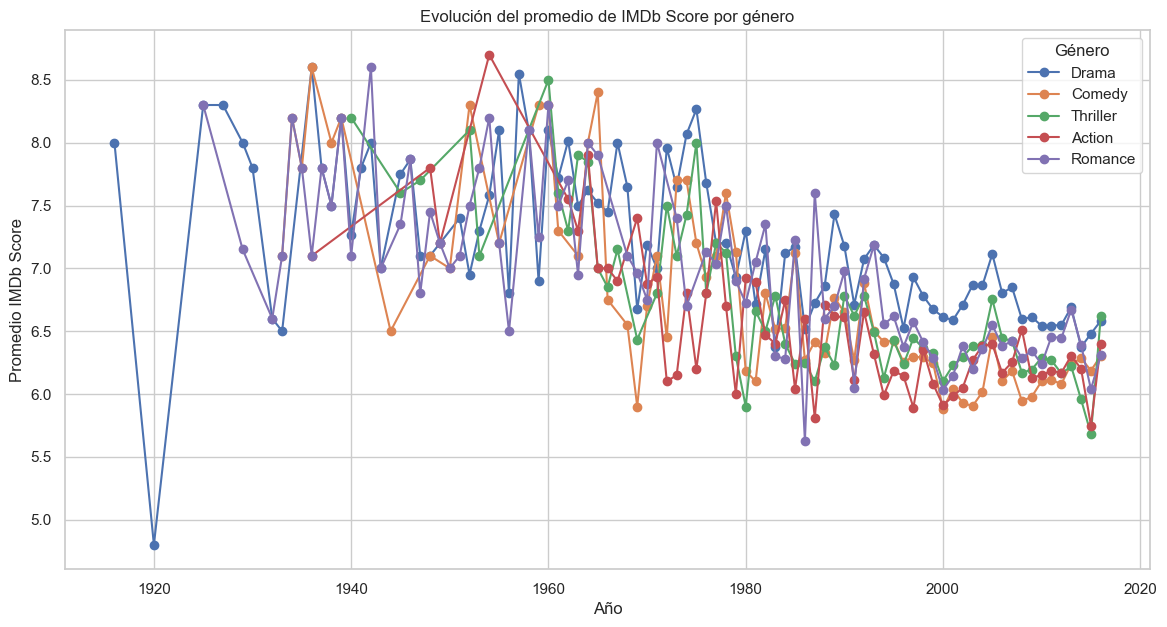

In [157]:
# Limpiar y preparar
df_clean = df.dropna(subset=['Genres', 'Imdb Score', 'Title Year']).copy()
df_clean = df_clean[df_clean['Title Year'].apply(lambda x: str(x).isdigit())]  # asegurar años válidos
df_clean['Title Year'] = df_clean['Title Year'].astype(int)

# Separar géneros
df_genres = df_clean.assign(Genre=df_clean['Genres'].str.split('|')).explode('Genre')

# Calcular promedio IMDb Score por año y género
promedios = df_genres.groupby(['Title Year', 'Genre'])['Imdb Score'].mean().reset_index()

# Filtrar solo géneros más frecuentes para que el gráfico no quede muy cargado
top_generos = df_genres['Genre'].value_counts().head(5).index
promedios_top = promedios[promedios['Genre'].isin(top_generos)]

# Graficar líneas múltiples
plt.figure(figsize=(14,7))
for genero in top_generos:
    datos = promedios_top[promedios_top['Genre'] == genero]
    plt.plot(datos['Title Year'], datos['Imdb Score'], marker='o', label=genero)

plt.title('Evolución del promedio de IMDb Score por género')
plt.xlabel('Año')
plt.ylabel('Promedio IMDb Score')
plt.legend(title='Género')
plt.grid(True)
plt.show()

Se calcula el beneficiio de cada película sabiendo su recuadación y su presupuesto

In [158]:
df["Profit"] = df["Gross"] - df["Budget"]

Se agrupa por director para sumar beneficios de todas sus películas

In [159]:
directores_profit = df.groupby('Director Name')['Profit'].sum()
sum = directores_profit.sort_values(ascending=False).head(5)
directores_profit = df.groupby('Director Name')['Profit'].mean()
mean = directores_profit.sort_values(ascending=False).head(5)
# sum_mean = pd.concat([sum, mean])

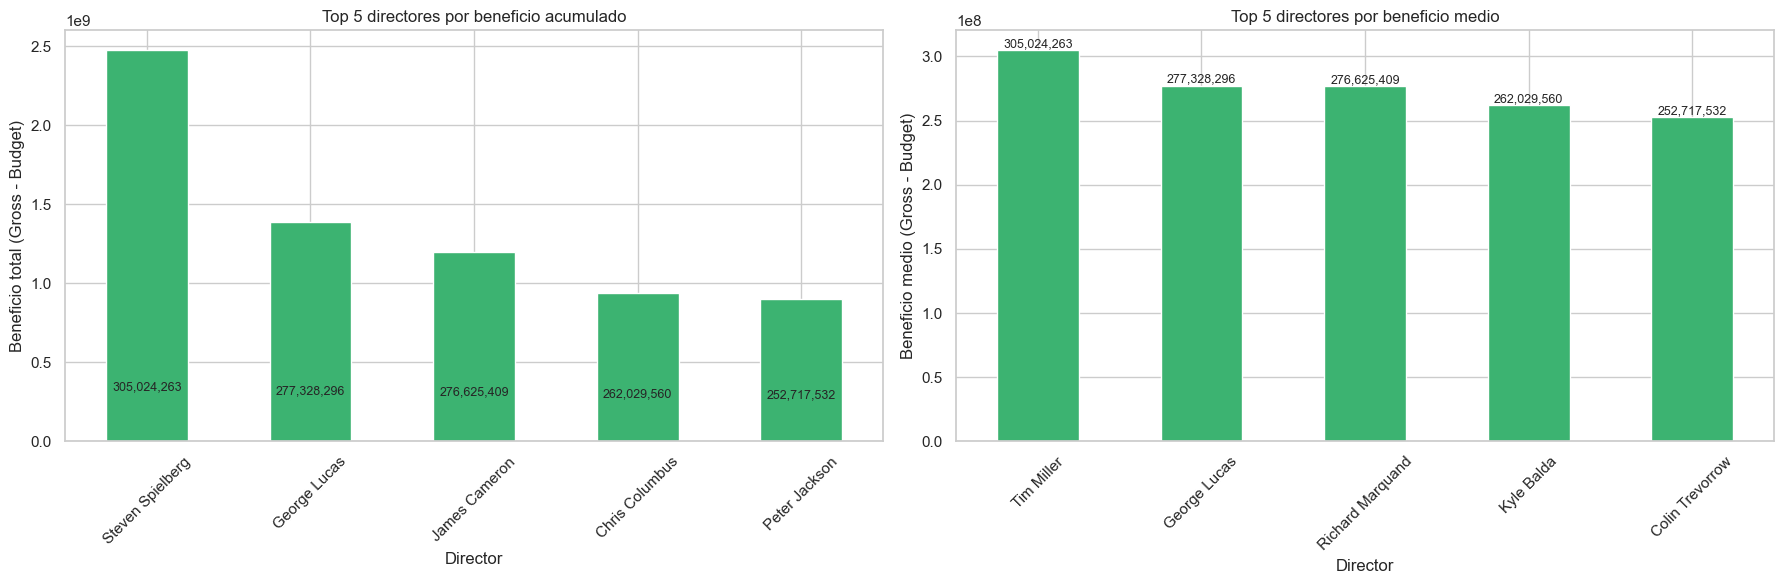

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))   # 1 fila, 2 columnas

# --- SUBGRAFICO 1: Beneficio total ---
sum.plot(kind='bar', color='mediumseagreen', ax=axes[0])
axes[0].set_title('Top 5 directores por beneficio acumulado')
axes[0].set_xlabel('Director')
axes[0].set_ylabel('Beneficio total (Gross - Budget)')
axes[0].tick_params(axis='x', rotation=45)


# --- SUBGRAFICO 2: Beneficio medio ---
mean.plot(kind='bar', color='mediumseagreen', ax=axes[1])
axes[1].set_title('Top 5 directores por beneficio medio')
axes[1].set_xlabel('Director')
axes[1].set_ylabel('Beneficio medio (Gross - Budget)')
axes[1].tick_params(axis='x', rotation=45)

# Etiquetas
for i, value in enumerate(mean):
    axes[0].text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=9)
    axes[1].text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()